In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

path = "/home/moises/Data_BTC_thesis/MtGox2014Leak/MtGox2014Leak/trades"

In [2]:
path = "/home/moises/Data_BTC_thesis/MtGox2014Leak/MtGox2014Leak/trades/trades USD"

#Read all csv files in the directory starting from 2011-04.csv to 2013-06_coinlab.csv
#and save them in a list of dataframes
list_filenames = []
dict_matgox_trades = {}
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        print(filename)
        list_filenames.append(filename)
        #read csv and skipp bad rows 

        dict_matgox_trades[filename] = pd.read_csv(os.path.join(path, filename), on_bad_lines='skip')
        
    else:
        continue


2011-10.csv
2011-12.csv
2013-05_coinlab.csv
2012-02.csv
2012-06.csv
2013-01_mtgox_japan.csv
2011-08.csv


/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2013-03-05_coinlab.csv
2011-09.csv
2013-02-12_mtgox_japan.csv
2013-03-26_coinlab.csv
2013-02-19_coinlab.csv
2012-11_mtgox_japan.csv
2013-03_mtgox_japan.csv
2013-03-19_coinlab.csv
2013-03-12_coinlab.csv
2013-03-19_mtgox_japan.csv
2013-07_coinlab.csv
2012-12_mtgox_japan.csv
2013-11_coinlab.csv
2013-10_mtgox_japan.csv
2011-04_mtgox_japan.csv
2013-03-26_mtgox_japan.csv
2013-06_coinlab.csv
2013-09_coinlab.csv
2013-06_mtgox_japan.csv
2012-09.csv
2011-05.csv
2011-06.csv
2013-09_mtgox_japan.csv
2012-08.csv
2013-01_coinlab.csv
2013-02-12_coinlab.csv
2013-02-19_mtgox_japan.csv
2011-04.csv
2013-11_mtgox_japan.csv


/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2013-10_coinlab.csv
2013-02_coinlab.csv
2011-07.csv
2013-02_mtgox_japan.csv
2013-02-26_coinlab.csv
2013-04_mtgox_japan.csv
2013-03_coinlab.csv
2013-08_coinlab.csv
2012-07.csv
2013-05_mtgox_japan.csv
2013-02-26_mtgox_japan.csv
2013-03-05_mtgox_japan.csv
2011-11.csv
2012-01.csv
2012-11_coinlab.csv
2013-04_coinlab.csv
2013-08_mtgox_japan.csv
2013-07_mtgox_japan.csv
2012-10.csv
2012-04.csv
2012-03.csv
2012-12_coinlab.csv
2013-03-12_mtgox_japan.csv
2012-05.csv


In [120]:
dict_matgox_trades_copy = dict_matgox_trades.copy()
dict_matgox_trades = dict_matgox_trades_copy.copy()

In [3]:
#Create a new column with the price of BTC in USD
print(list_filenames)

for filename in list_filenames:
    print(filename, dict_matgox_trades[filename].shape)
    #get only transactions in USD and money > 10
    dict_matgox_trades[filename] = dict_matgox_trades[filename][dict_matgox_trades[filename]["Currency"] == "USD"]
    
    #dict_matgox_trades[filename] = dict_matgox_trades[filename][dict_matgox_trades[filename]["Money"] > 10]
    
    dict_matgox_trades[filename]["Price BTC/USD"] = dict_matgox_trades[filename]["Money"] / dict_matgox_trades[filename]["Bitcoins"]
    dict_matgox_trades[filename]["Date"] = pd.to_datetime(dict_matgox_trades[filename]["Date"])
    dict_matgox_trades[filename].set_index("Date", inplace=True)
    #dict_matgox_trades[filename]["Price BTC/USD"].plot()

['2011-10.csv', '2011-12.csv', '2013-05_coinlab.csv', '2012-02.csv', '2012-06.csv', '2013-01_mtgox_japan.csv', '2011-08.csv', '2013-03-05_coinlab.csv', '2011-09.csv', '2013-02-12_mtgox_japan.csv', '2013-03-26_coinlab.csv', '2013-02-19_coinlab.csv', '2012-11_mtgox_japan.csv', '2013-03_mtgox_japan.csv', '2013-03-19_coinlab.csv', '2013-03-12_coinlab.csv', '2013-03-19_mtgox_japan.csv', '2013-07_coinlab.csv', '2012-12_mtgox_japan.csv', '2013-11_coinlab.csv', '2013-10_mtgox_japan.csv', '2011-04_mtgox_japan.csv', '2013-03-26_mtgox_japan.csv', '2013-06_coinlab.csv', '2013-09_coinlab.csv', '2013-06_mtgox_japan.csv', '2012-09.csv', '2011-05.csv', '2011-06.csv', '2013-09_mtgox_japan.csv', '2012-08.csv', '2013-01_coinlab.csv', '2013-02-12_coinlab.csv', '2013-02-19_mtgox_japan.csv', '2011-04.csv', '2013-11_mtgox_japan.csv', '2013-10_coinlab.csv', '2013-02_coinlab.csv', '2011-07.csv', '2013-02_mtgox_japan.csv', '2013-02-26_coinlab.csv', '2013-04_mtgox_japan.csv', '2013-03_coinlab.csv', '2013-08_coin

In [4]:
# get the price and the type of the transaction
for filename in list_filenames:
    print(filename, dict_matgox_trades[filename].shape)
    try:
        dict_matgox_trades[filename] = dict_matgox_trades[filename][["Price BTC/USD", "Type", "Money", "User_Country", "User_State"]]

    except: #if the column User_State and User_country does not exis
        dict_matgox_trades[filename] = dict_matgox_trades[filename][["Price BTC/USD", "Type", "Money"]]
        # create a column with the country and state of the user with nan values
        dict_matgox_trades[filename]["User_Country"] = np.nan
        dict_matgox_trades[filename]["User_State"] = np.nan
    #dict_matgox_trades[filename]["Price BTC/USD"].plot()
#dict_matgox_trades[filename][column = ["Price BTC/USD"]]

2011-10.csv (383918, 15)


/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/moises/.pyenv/versions/3.7.6/envs/bitcoin/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


2011-12.csv (346734, 15)
2013-05_coinlab.csv (310521, 19)
2012-02.csv (543694, 15)
2012-06.csv (288496, 15)
2013-01_mtgox_japan.csv (301668, 19)
2011-08.csv (351728, 15)
2013-03-05_coinlab.csv (38831, 15)
2011-09.csv (377382, 15)
2013-02-12_mtgox_japan.csv (112424, 15)
2013-03-26_coinlab.csv (52708, 15)
2013-02-19_coinlab.csv (40677, 15)
2012-11_mtgox_japan.csv (182910, 19)
2013-03_mtgox_japan.csv (615734, 19)
2013-03-19_coinlab.csv (63549, 15)
2013-03-12_coinlab.csv (39349, 15)
2013-03-19_mtgox_japan.csv (185404, 15)
2013-07_coinlab.csv (160068, 19)
2012-12_mtgox_japan.csv (218448, 19)
2013-11_coinlab.csv (354504, 19)
2013-10_mtgox_japan.csv (445422, 19)
2011-04_mtgox_japan.csv (26739, 15)
2013-03-26_mtgox_japan.csv (160404, 15)
2013-06_coinlab.csv (180652, 19)
2013-09_coinlab.csv (155621, 19)
2013-06_mtgox_japan.csv (611182, 19)
2012-09.csv (189946, 15)
2011-05.csv (86710, 15)
2011-06.csv (288562, 15)
2013-09_mtgox_japan.csv (415058, 19)
2012-08.csv (496982, 15)
2013-01_coinlab.csv (

In [6]:
#Create a data frame with all transactions in USD with money > 10
df_price_btc_usd_mtgox = pd.DataFrame(pd.concat([dict_matgox_trades[filename][["Price BTC/USD","Type", "Money","User_Country", "User_State"]] for filename in list_filenames]))

In [7]:
#Create a data frame with all transactions buy and onother with all transactions sell
df_price_btc_usd_mtgox_buy = df_price_btc_usd_mtgox[df_price_btc_usd_mtgox["Type"] == "buy"]
df_price_btc_usd_mtgox_sell = df_price_btc_usd_mtgox[df_price_btc_usd_mtgox["Type"] == "sell"]


In [14]:
# remove all columns with nan values
df_price_btc_usd_mtgox_buy_drop_na = df_price_btc_usd_mtgox_buy.dropna()

In [27]:

# Group by date and calculate the weighted mean
def weighted_mean(group):
    if group['Money'].sum() == 0:
        return np.nan
    else:
        return (group['Money'] * group['Price BTC/USD']).sum() / group['Money'].sum()

df_price_btc_usd_mtgox_buy_daily_weighted = df_price_btc_usd_mtgox_buy.groupby(pd.Grouper(freq='D')).apply(weighted_mean)
df_price_btc_usd_mtgox_sell_daily_weighted = df_price_btc_usd_mtgox_sell.groupby(pd.Grouper(freq='D')).apply(weighted_mean)


In [41]:
#groupby date day and calculate the volume of buy and sell that is the sum of money
df_price_btc_usd_mtgox_buy_daily_volume = df_price_btc_usd_mtgox_buy.groupby(pd.Grouper(freq='D'))["Money"].sum()

#rename columns 
df_price_btc_usd_mtgox_buy_daily_volume = df_price_btc_usd_mtgox_buy_daily_volume.rename("DTVL_BTC_USD")

#return to df format
df_price_btc_usd_mtgox_buy_daily_volume = df_price_btc_usd_mtgox_buy_daily_volume.to_frame()

In [42]:
df_price_btc_usd_mtgox_buy_daily_volume

,DTVL_BTC_USD
Date,
2011-04-01,4.560282e+03
2011-04-02,3.458824e+03
2011-04-03,5.914026e+03
2011-04-04,4.209062e+04
2011-04-05,1.128817e+04
...,...
2013-11-26,3.843524e+07
2013-11-27,5.247927e+07
2013-11-28,5.711677e+07


In [28]:
#rename the column
df_price_btc_usd_mtgox_buy_daily_weighted = df_price_btc_usd_mtgox_buy_daily_weighted.rename("Price BTC/USD") 
df_price_btc_usd_mtgox_buy_daily_weighted = pd.DataFrame(df_price_btc_usd_mtgox_buy_daily_weighted)

df_price_btc_usd_mtgox_sell_daily_weighted = df_price_btc_usd_mtgox_sell_daily_weighted.rename("Price BTC/USD")
df_price_btc_usd_mtgox_sell_daily_weighted = pd.DataFrame(df_price_btc_usd_mtgox_sell_daily_weighted)

In [134]:
#groupy by day and save the mean of the price of BTC/USD
df_price_btc_usd_mtgox_buy_daily = df_price_btc_usd_mtgox_buy.groupby(pd.Grouper(freq='D')).mean()
df_price_btc_usd_mtgox_sell_daily = df_price_btc_usd_mtgox_sell.groupby(pd.Grouper(freq='D')).mean()


In [1]:
#group by hour and save the mean of the price of BTC/USD
df_price_btc_usd_mtgox_buy_hourly = df_price_btc_usd_mtgox_buy.groupby(pd.Grouper(freq='H')).mean()

NameError: name 'df_price_btc_usd_mtgox_buy' is not defined

In [114]:
#save df_price_btc_usd_mtgox to csv
df_price_btc_usd_mtgox_daily.to_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_mtgox_daily.csv")

In [164]:
df_price_btc_usd_mtgox_buy_daily_weighted

,Price BTC/USD,Type,Money
0,0.779071,buy,18.06100
1,0.779071,buy,27.30000
2,0.779071,buy,136.92000
3,0.779071,buy,66.74900
4,0.779071,buy,130.85900
...,...,...,...
4940052,1207.218367,buy,127.28569
4940053,1207.218367,buy,12.06000
4940054,1207.218367,buy,108.53999
4940055,1207.218367,buy,101.59345


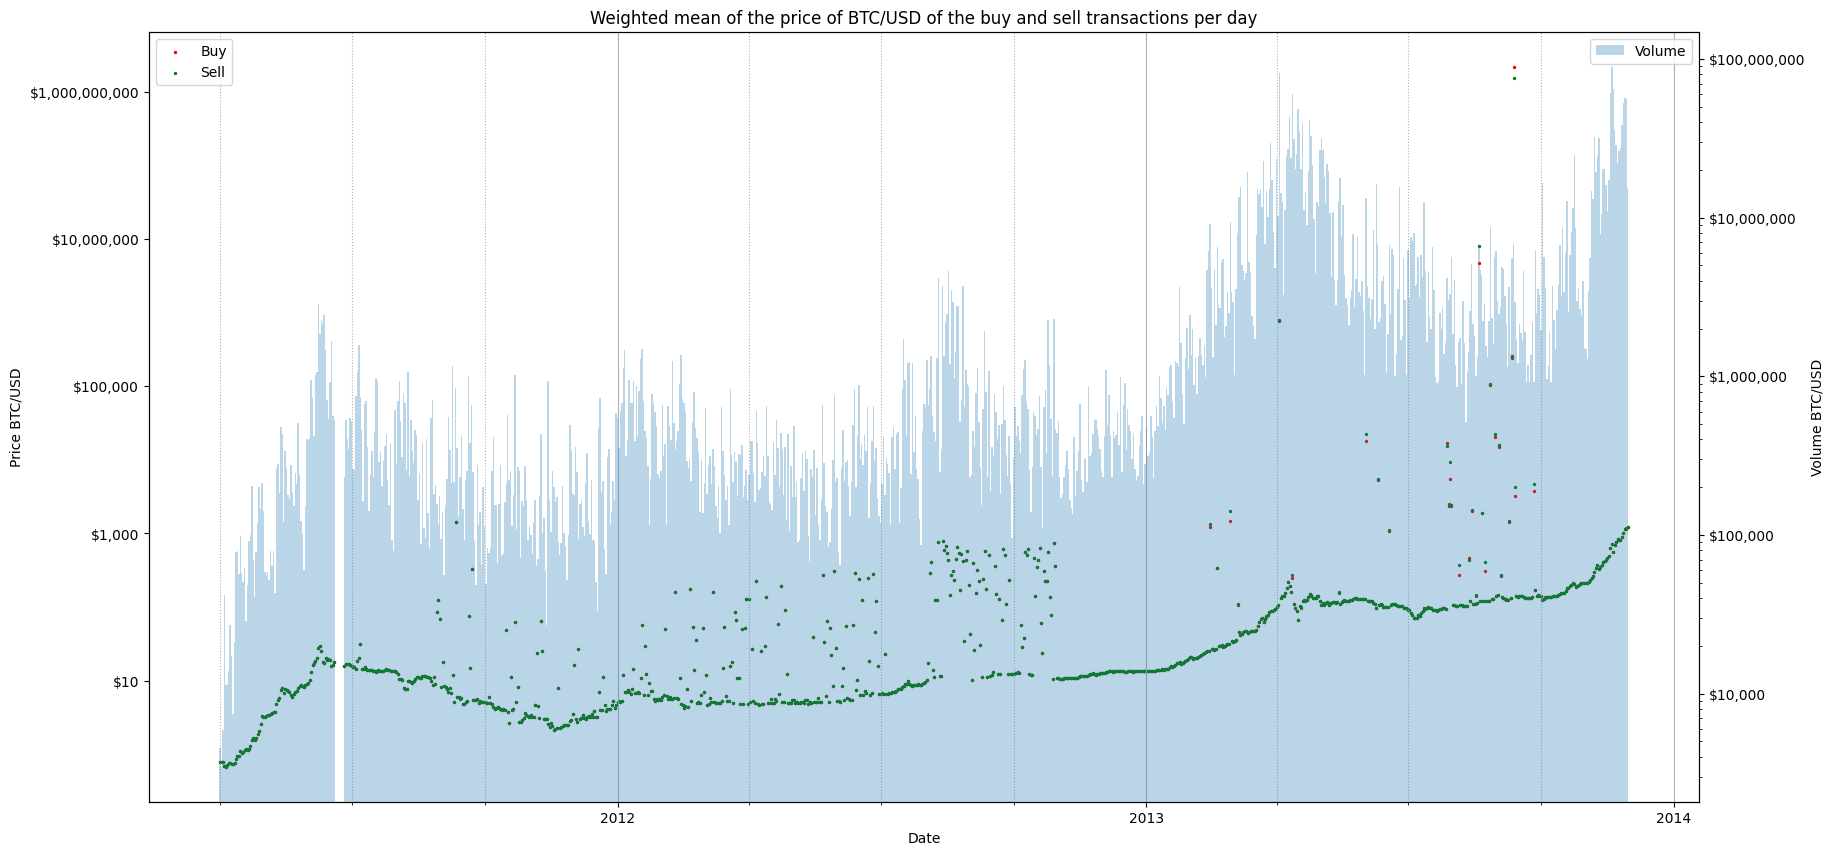

In [55]:
#Create a beutiful plot of the price of BTC/USD
plt.figure(figsize=(20,10))


#plt.plot(df_price_btc_usd_mtgox_buy_daily["Price BTC/USD"])
# plot scatterplot of the price of BTC/USD of the buy df
plt.scatter(df_price_btc_usd_mtgox_buy_daily_weighted.index, df_price_btc_usd_mtgox_buy_daily_weighted["Price BTC/USD"], s=2, c="red", label="Buy")
# plot scatterplot of the price of BTC/USD of the sell df
plt.scatter(df_price_btc_usd_mtgox_sell_daily_weighted.index, df_price_btc_usd_mtgox_sell_daily_weighted["Price BTC/USD"], s=2, c="green", label="Sell")

plt.title("Weighted mean of the price of BTC/USD of the buy and sell transactions per day")
plt.xlabel("Date")
plt.ylabel("Price BTC/USD")
# y axis in log scale and dolar sign
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
# x axis and grids in years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# set minor locator to quarters of the year
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator(bymonth=[1,4,7,10]))
plt.grid(which='major', axis='x', linestyle='-')
plt.grid(which='minor', axis='x', linestyle=':')


#plot legend giving name to the colors
plt.legend(loc="upper left", labels=["Buy", "Sell", "Volume"])

#plot volume in another axis with bar plot and alpha 0.5
ax2 = plt.gca().twinx()
ax2.bar(df_price_btc_usd_mtgox_buy_daily_volume.index, df_price_btc_usd_mtgox_buy_daily_volume["DTVL_BTC_USD"], alpha=0.3, width=1, label="Volume")
ax2.set_ylabel("Volume BTC/USD")
ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
ax2.grid(which='major', axis='x', linestyle='-')
ax2.grid(which='minor', axis='x', linestyle=':')
#ax2.set_ylim(0, 1000000000)


#plot legend 
plt.legend(loc="upper right", labels=["Volume"])

plt.show()


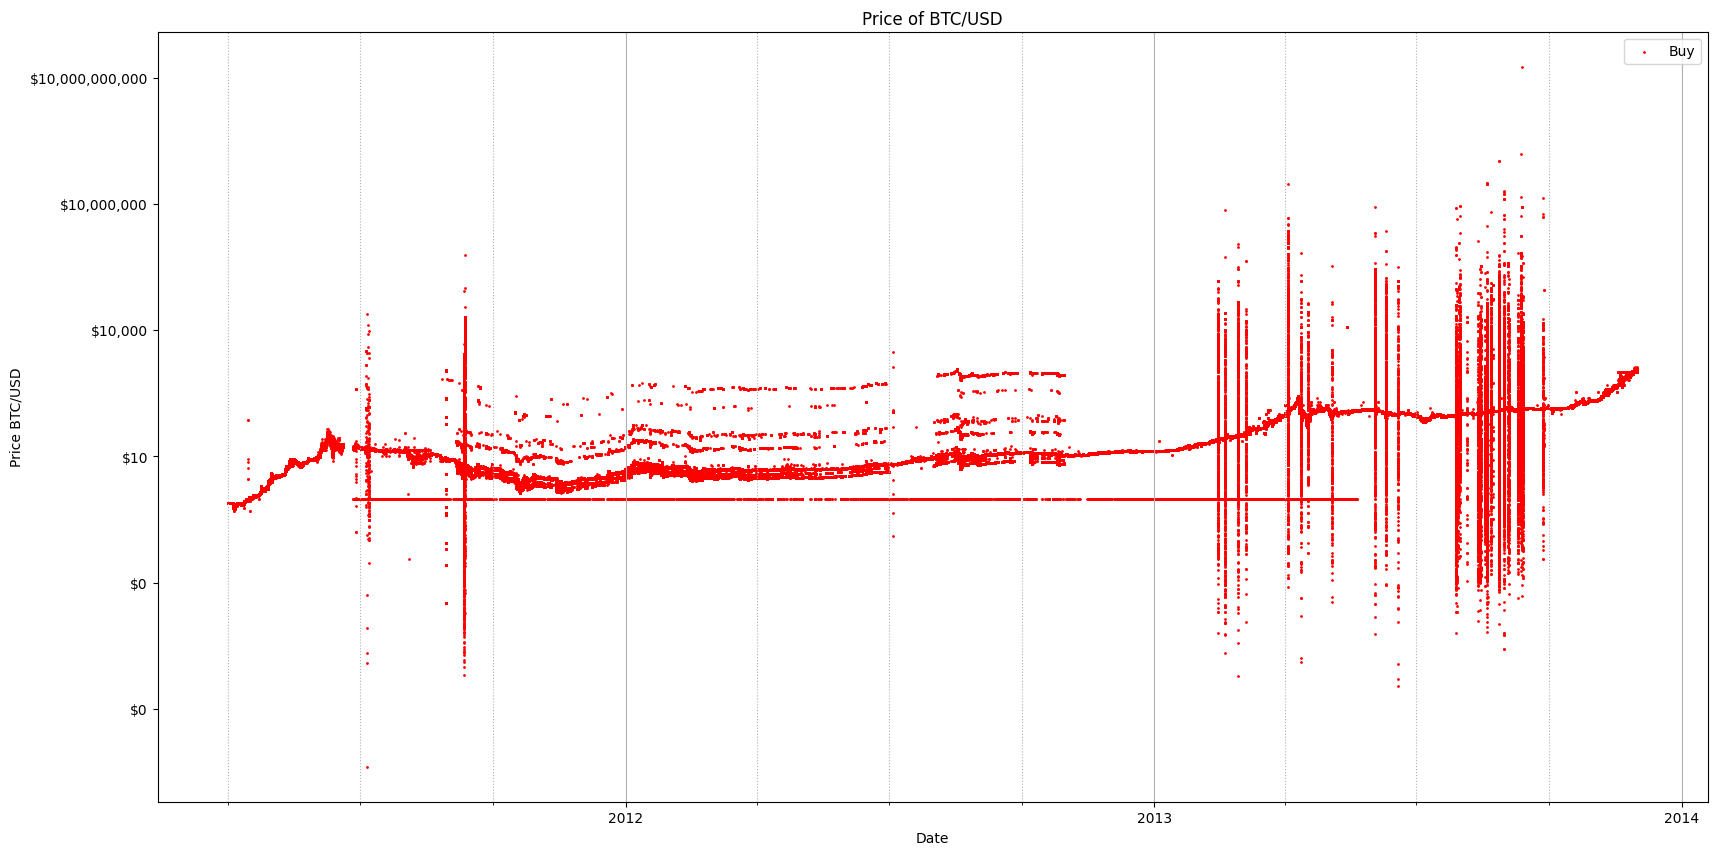

In [26]:
#Create a beutiful plot of the price of BTC/USD
plt.figure(figsize=(20,10))
#plt.plot(df_price_btc_usd_mtgox_buy_daily["Price BTC/USD"])
# plot scatterplot of the price of BTC/USD
plt.scatter(df_price_btc_usd_mtgox_sell.index, df_price_btc_usd_mtgox_sell["Price BTC/USD"], s=1, c="red", label="Buy")

plt.title("Price of BTC/USD")
plt.xlabel("Date")
plt.ylabel("Price BTC/USD")
# y axis in log scale and dolar sign
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
# x axis and grids in years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# set minor locator to quarters of the year
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator(bymonth=[1,4,7,10]))
plt.grid(which='major', axis='x', linestyle='-')
plt.grid(which='minor', axis='x', linestyle=':')

#plot the moving average of 30 days and 1 standard deviation up and down filling the area
#plt.plot(df_price_btc_usd_mtgox_buy_hourly.index, df_price_btc_usd_mtgox_buy_hourly["Price BTC/USD"].rolling(3000).mean(), c="black", label="30 days moving average")

#fill the area betwing the mean and the standard deviation
#plt.fill_between(df_price_btc_usd_mtgox_buy_hourly.index, df_price_btc_usd_mtgox_buy_hourly["Price BTC/USD"].rolling(1000).mean() + df_price_btc_usd_mtgox_buy_hourly["Price BTC/USD"].rolling(1000).std(), df_price_btc_usd_mtgox_buy_hourly["Price BTC/USD"].rolling(1000).mean() - df_price_btc_usd_mtgox_buy_hourly["Price BTC/USD"].rolling(1000).std(), color="black", alpha=0.2, label="30 days moving average + 1 std")

#color the dots given the country of the user
#sns.scatterplot(df_price_btc_usd_mtgox_sell.index, df_price_btc_usd_mtgox_sell["Price BTC/USD"], hue=df_price_btc_usd_mtgox_sell["User_Country"], palette="Set2", s=1)

plt.legend()




plt.show()


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

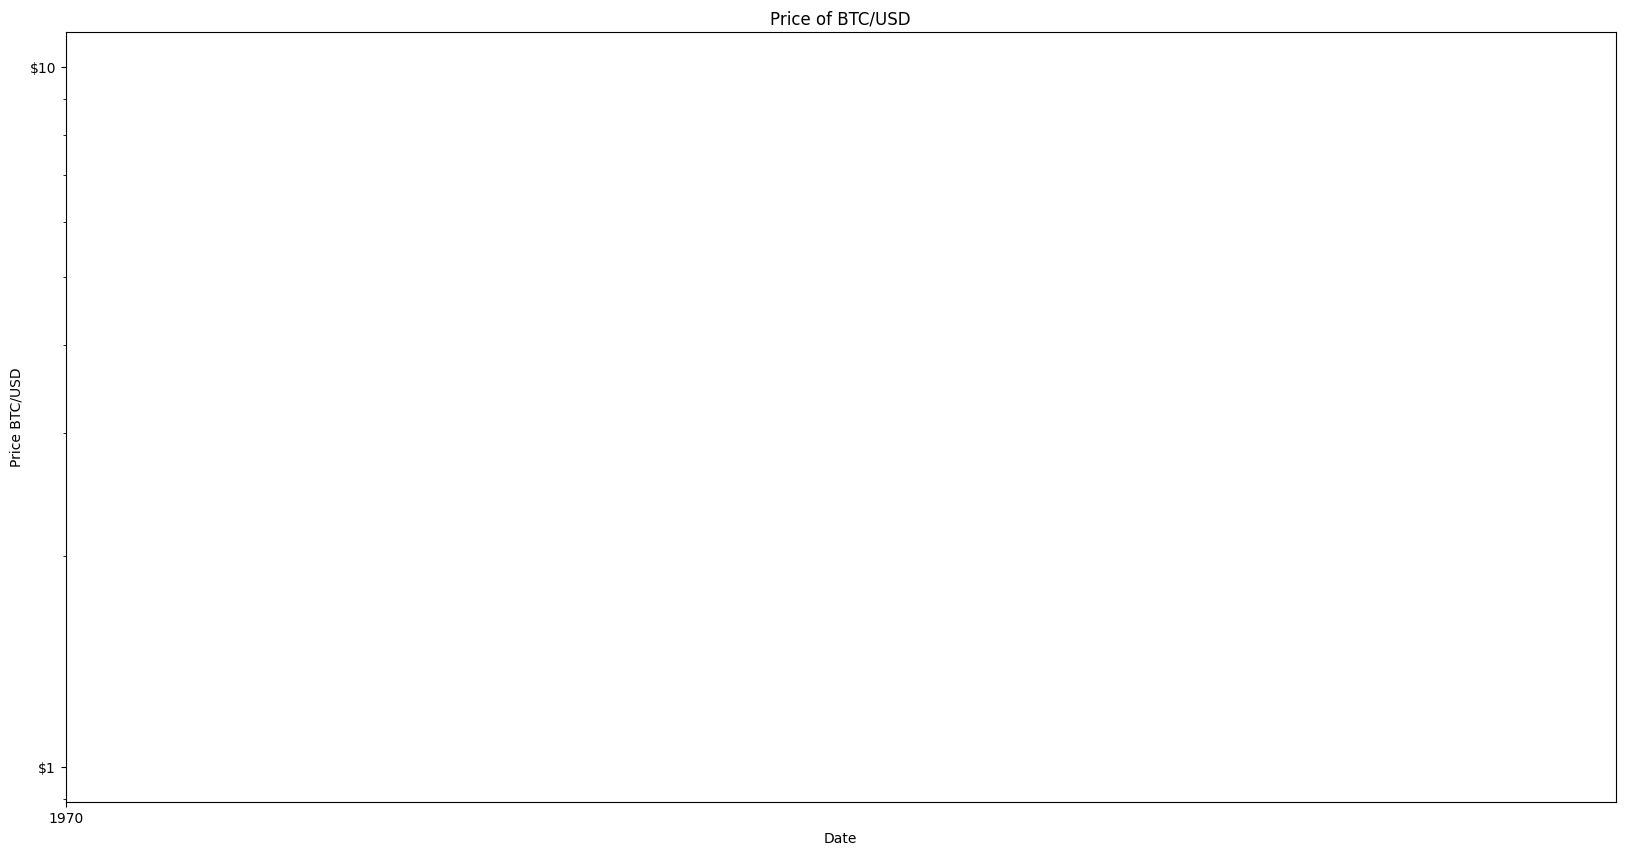

In [10]:
#plot a beautiful scatterplot and color the dots given the country of the user
plt.figure(figsize=(20,10))
plt.title("Price of BTC/USD")
plt.xlabel("Date")
plt.ylabel("Price BTC/USD")
# y axis in log scale and dolar sign
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
# x axis and grids in years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y')) 
sns.scatterplot(df_price_btc_usd_mtgox_sell.index, df_price_btc_usd_mtgox_sell["Price BTC/USD"], hue=df_price_btc_usd_mtgox_sell["User_Country"], palette="Set2", s=1)


<AxesSubplot:title={'center':'Price of BTC/USD'}, xlabel='Date', ylabel='Price BTC/USD'>

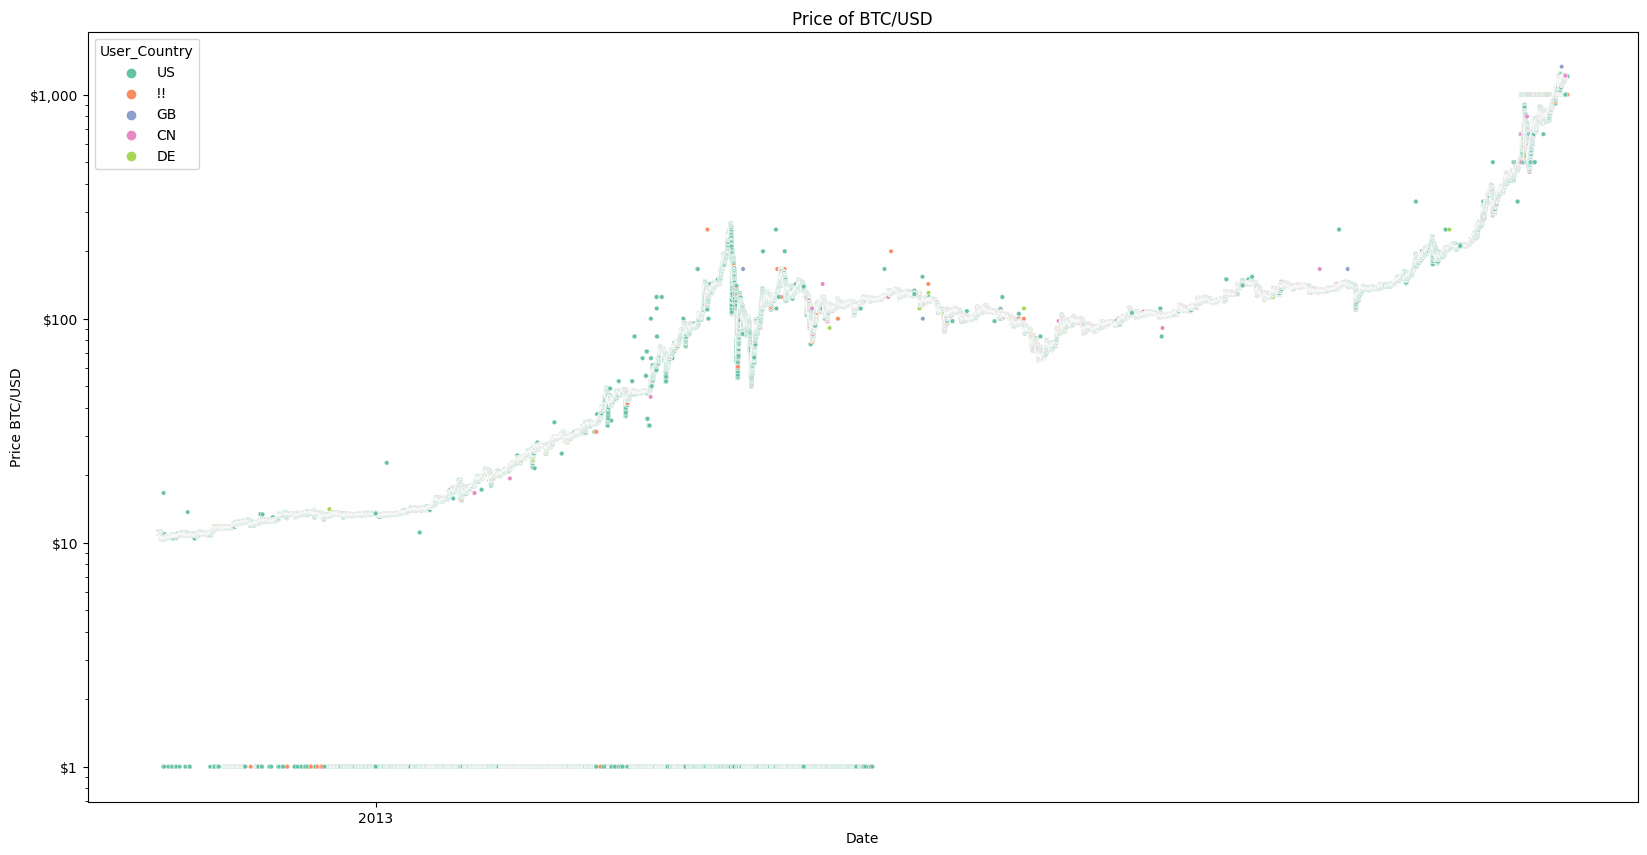

In [25]:
# plot a beatuful scatterplot and color the dots given the country of the user
#df_price_btc_usd_mtgox_buy_drop_na
plt.figure(figsize=(20,10))
plt.title("Price of BTC/USD")
plt.xlabel("Date")
plt.ylabel("Price BTC/USD")
# y axis in log scale and dolar sign
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
# x axis and grids in years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
# plot just the 5 most important countries that appear more 
top_countries = df_price_btc_usd_mtgox_buy_drop_na["User_Country"].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 countries
filtered_df = df_price_btc_usd_mtgox_buy_drop_na[df_price_btc_usd_mtgox_buy_drop_na["User_Country"].isin(top_countries)]

sns.scatterplot(
    data=filtered_df,
    x=filtered_df.index,
    y="Price BTC/USD",
    hue="User_Country",
    palette="Set2",
    s=10,  # Adjust the size as needed
)


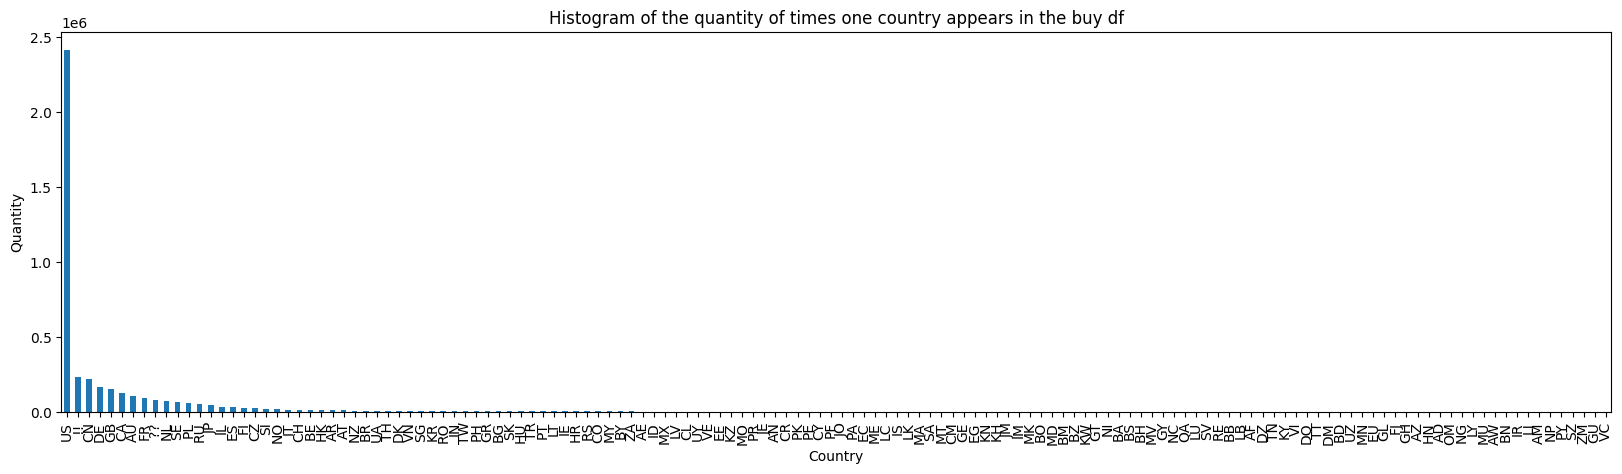

In [24]:
#plot the histogram of the quantity of times one country appears in the buy df
plt.figure(figsize=(20,10))
plt.title("Histogram of the quantity of times one country appears in the buy df")
plt.xlabel("Country")
plt.ylabel("Quantity")
df_price_btc_usd_mtgox_buy_drop_na["User_Country"].value_counts().plot(kind="bar")
# give more space to the x axis
plt.gcf().subplots_adjust(bottom=0.5)
plt.show()


In [51]:
dict_matgox_trades[filename].head(20)

,Trade_Id,User_Id,User,User_Id_Hash,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY,User_Country,User_State,Price USD
Date,,,,,,,,,,,,,,,,,,,
2013-11-01 00:02:42,1383264162627491,488195,b2957732-ad4b-4da9-b2bf-b426dbc7eb80,d80675b0aa8ed7ba4bad3b5692636327,NJP,buy,USD,0.200000,42.24035,98.226,4149.098,0.00000,98.226,0.000,0.000232,4.696,NL,NaN,211.201750
2013-11-01 00:02:42,1383264162627491,663018,7545fad2-7f1a-4d91-9c69-41d691dae6be,fc7b530cefad7ff239b9f34e5fc8e208,NJP,sell,USD,0.200000,42.24035,98.226,4149.098,0.10138,98.226,9.958,0.000000,0.000,NaN,NaN,211.201750
2013-11-01 00:05:39,1383264339022386,29144,55f43ee2-c476-40c8-b590-3cb408263c61,6919d71e81ba7c681249b49279a82734,NJP,sell,USD,3.512597,748.18320,98.226,73490.996,1.79564,98.226,176.378,0.000000,0.000,US,!!,212.999999
2013-11-01 00:05:39,1383264339337699,288988,32ae2ea8-486f-48ef-adb9-d80077f96230,e33e7627a25f4b627d20cfde1e69f5ab,NJP,sell,USD,0.521608,111.20678,98.226,10923.390,0.24466,98.226,24.032,0.000000,0.000,US,CA,213.199998
2013-11-01 00:05:39,1383264339710898,490089,4db7cce8-80b9-419a-bf74-670a3225cc4f,205f3f63c2aaeb7addc3c4e17413fa05,NJP,sell,USD,1.857000,396.46614,98.226,38943.258,0.47576,98.226,46.732,0.000000,0.000,US,NJ,213.498191
2013-11-01 00:05:39,1383264339954281,488195,b2957732-ad4b-4da9-b2bf-b426dbc7eb80,d80675b0aa8ed7ba4bad3b5692636327,NJP,sell,USD,1.016018,216.91992,98.226,21307.162,0.25163,98.226,24.716,0.000000,0.000,NL,NaN,213.499992
2013-11-01 00:05:40,1383264340006212,488195,b2957732-ad4b-4da9-b2bf-b426dbc7eb80,d80675b0aa8ed7ba4bad3b5692636327,NJP,sell,USD,4.446160,949.25506,98.226,93241.467,1.10114,98.226,108.160,0.000000,0.000,NL,NaN,213.499989
2013-11-01 00:05:46,1383264346574673,203501,b96c9fcb-be6d-4798-93ab-a0adf846e257,17836403fa8456a466dfc1824ac8aa0e,NJP,buy,USD,0.010000,2.13500,98.226,209.712,0.00000,98.226,0.000,0.000024,0.486,US,UT,213.500000
2013-11-01 00:05:46,1383264346574673,488195,b2957732-ad4b-4da9-b2bf-b426dbc7eb80,d80675b0aa8ed7ba4bad3b5692636327,NJP,sell,USD,0.010000,2.13500,98.226,209.712,0.00248,98.226,0.243,0.000000,0.000,NL,NaN,213.500000


In [16]:
data_df = pd.read_csv(os.path.join(path, "2011-04.csv"))

In [45]:
data_df["Date"] = pd.to_datetime(data_df["Date"])

In [25]:
data_df["Date"] = data_df["Date"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [17]:
data_df["price"] = data_df["Money"]/data_df["Bitcoins"]